In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [135]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [137]:
df=df.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'Mspend'},axis=1)

In [138]:
df.shape

(50, 5)

In [139]:
#checking for null values:
df.isnull().sum()

RDS       0
Admin     0
Mspend    0
State     0
Profit    0
dtype: int64

In [140]:
#Checking for duplicates:
df[df.duplicated()] #no duplicate records found

,RDS,Admin,Mspend,State,Profit


In [141]:
df.describe()

,RDS,Admin,Mspend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Text(0.5, 1.0, 'Correlation Heatmap')

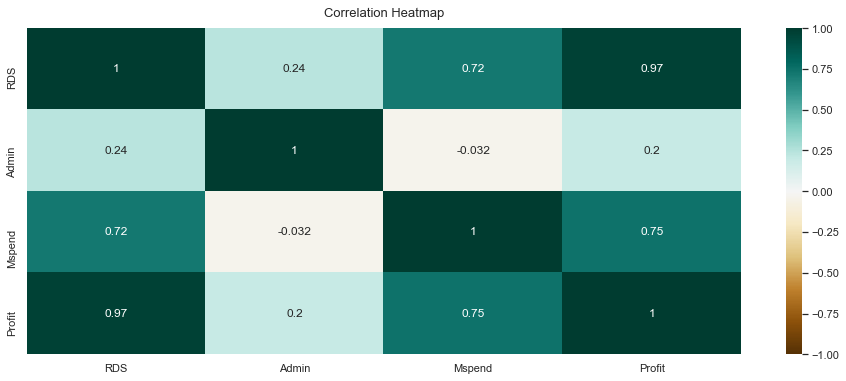

In [142]:
#Correlation matrix:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True,cmap="BrBG")
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':13},pad=12)

Text(0.5, 1.0, 'Triangle heatmap correlation')

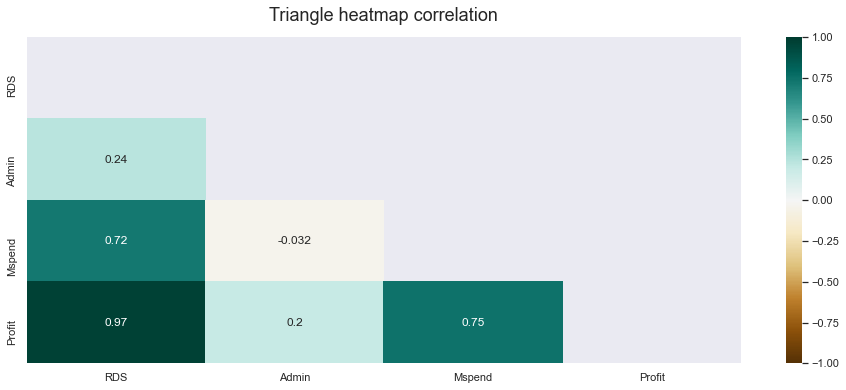

In [143]:
#Trying to display only the lower triangle of the heatmap for better visualization:
import numpy as np
mask = np.triu(np.ones_like(df.corr(),dtype=np.bool))
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True,cmap='BrBG' )
heatmap.set_title("Triangle heatmap correlation", fontdict={'fontsize':18},pad=16)

Text(0.5, 1.0, 'Features correlating with Profit')

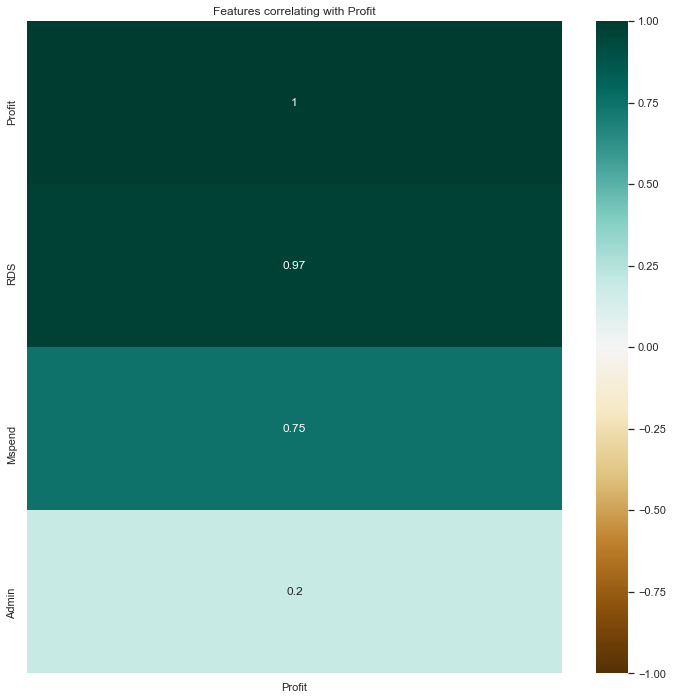

In [144]:
features = sns.heatmap(df.corr()[['Profit']].sort_values(by='Profit',ascending=False), vmin=-1, vmax=1, annot=True,
                       cmap='BrBG')
features.set_title("Features correlating with Profit")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021152C9A8E0>,
      dtype=object)

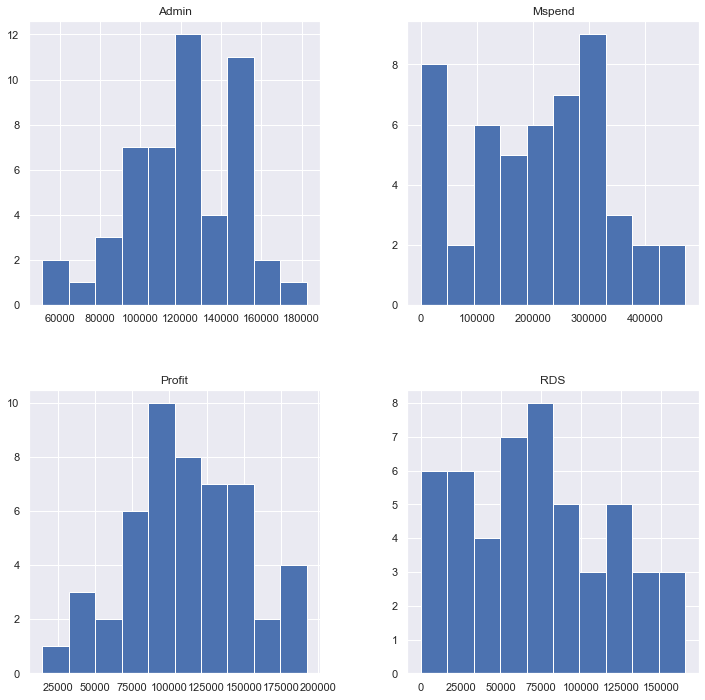

In [145]:
df.hist()

In [146]:
#Converting the categorical variable with dummy variables:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [147]:
df['State']=pd.Categorical(df['State'])

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RDS     50 non-null     float64 
 1   Admin   50 non-null     float64 
 2   Mspend  50 non-null     float64 
 3   State   50 non-null     category
 4   Profit  50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.8 KB


In [149]:
df_dummy = pd.get_dummies(df['State'])

In [150]:
df_dummy.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [151]:
df = pd.concat([df, df_dummy], axis=1)
df.head()

,RDS,Admin,Mspend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [152]:
df_plot =  df[['Profit','Mspend','Admin','RDS']]

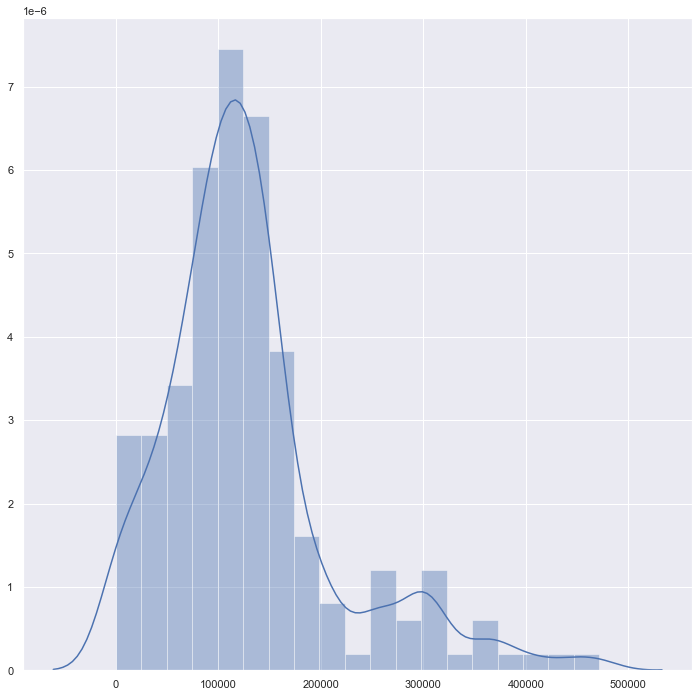

In [153]:
sns.distplot(df_plot)

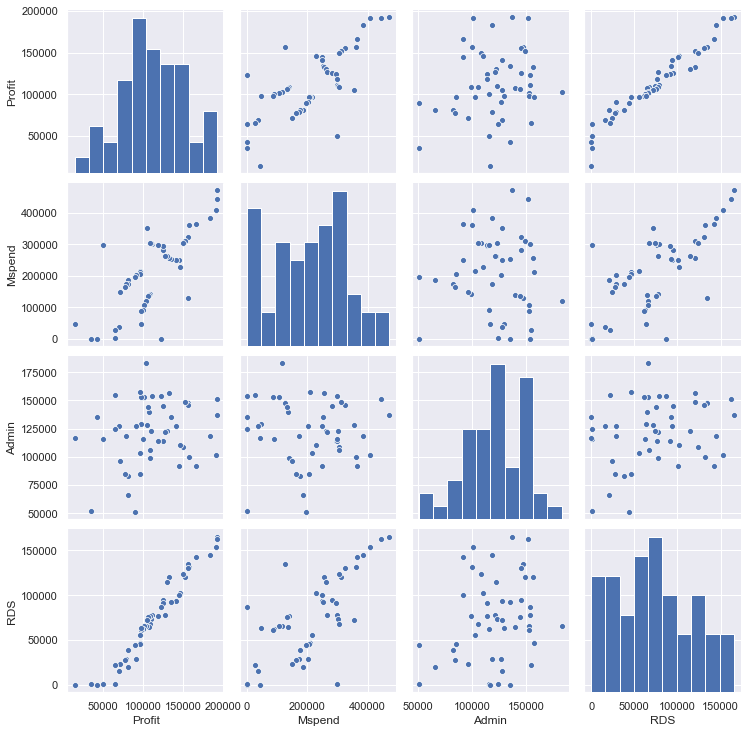

In [154]:
sns.pairplot(df_plot)

In [155]:
#Model building:
profit_model = smf.ols("Profit ~ Mspend + Admin + RDS", data=df).fit()

In [156]:
profit_model.params

Intercept    50122.192990
Mspend           0.027228
Admin           -0.026816
RDS              0.805715
dtype: float64

In [157]:
np.round(profit_model.pvalues,5)

Intercept    0.00000
Mspend       0.10472
Admin        0.60176
RDS          0.00000
dtype: float64

In [158]:
profit_model.tvalues

Intercept     7.626218
Mspend        1.655077
Admin        -0.525507
RDS          17.846374
dtype: float64

In [159]:
profit_model.rsquared, profit_model.rsquared_adj # The accuracy is around 94.75%

(0.9507459940683246, 0.9475337762901719)

From the model's p values, we could see that the marketing spend and administration variables are not significant to the profit variable as its values are much higher than 0.05

Separate simple linear regression models and two variable combined multiple linear regression models are to be built for the insignificant variables marketing spend and administration.

In [160]:
mspend_slr = smf.ols("Profit~Mspend",data=df).fit()

In [161]:
mspend_slr.params

Intercept    60003.548816
Mspend           0.246459
dtype: float64

In [162]:
mspend_slr.pvalues, mspend_slr.tvalues

(Intercept    4.294735e-10
 Mspend       4.381073e-10
 dtype: float64,
 Intercept    7.808356
 Mspend       7.802657
 dtype: float64)

The marketing spend has significance in determining the price

In [163]:
admin_slr = smf.ols("Profit~Admin",data=df).fit()

In [164]:
admin_slr.params

Intercept    76974.471305
Admin            0.288749
dtype: float64

In [165]:
np.round(admin_slr.pvalues,5), admin_slr.tvalues

(Intercept    0.00382
 Admin        0.16222
 dtype: float64,
 Intercept    3.040044
 Admin        1.419493
 dtype: float64)

Tha administration variable is insignificant as the pvalue is higher than 0.05

In [166]:
#Multiple linear regression with admin and mspend
mlr_admin_mspend = smf.ols("Profit~Admin+Mspend",data=df).fit()

In [167]:
mlr_admin_mspend.params

Intercept    20224.429059
Admin            0.323673
Mspend           0.248844
dtype: float64

In [168]:
np.round(mlr_admin_mspend.pvalues,5), mlr_admin_mspend.tvalues

(Intercept    0.25893
 Admin        0.01729
 Mspend       0.00000
 dtype: float64,
 Intercept    1.142741
 Admin        2.467779
 Mspend       8.281039
 dtype: float64)

Now both the variables have significant pvalue.

In [170]:
#Model validation:
#1.collinearity check:
#looking for VIF:
rsq_r=smf.ols("RDS~Admin+Mspend",data=df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Admin~RDS+Mspend",data=df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Mspend~RDS+Admin",data=df).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','Admin','Mspend'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,Admin,1.175091
2,Mspend,2.326773


In [178]:
#predictions:
finalmodel_pred = profit_model.predict(df)

None of the variable has vif>10, we consider all the variable to be significant

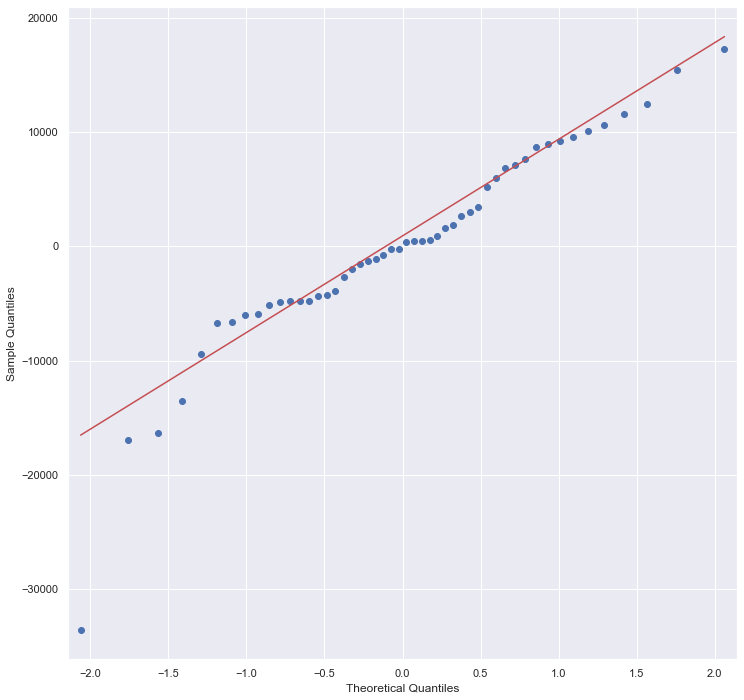

In [171]:
#Residual analysis:
#Q-Q plot:
import pylab
import scipy.stats as st
sm.qqplot(profit_model.resid, line='q')
plt.show()

Text(0, 0.5, 'Fitted values')

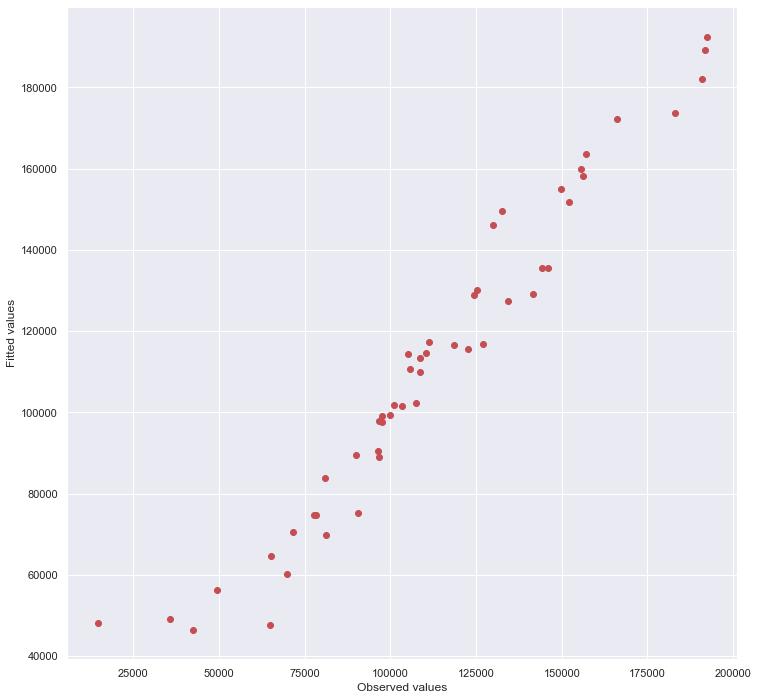

In [180]:
#1. Linearity:
plt.scatter(df['Profit'],finalmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Fitted values")

Text(0, 0.5, 'Residuals')

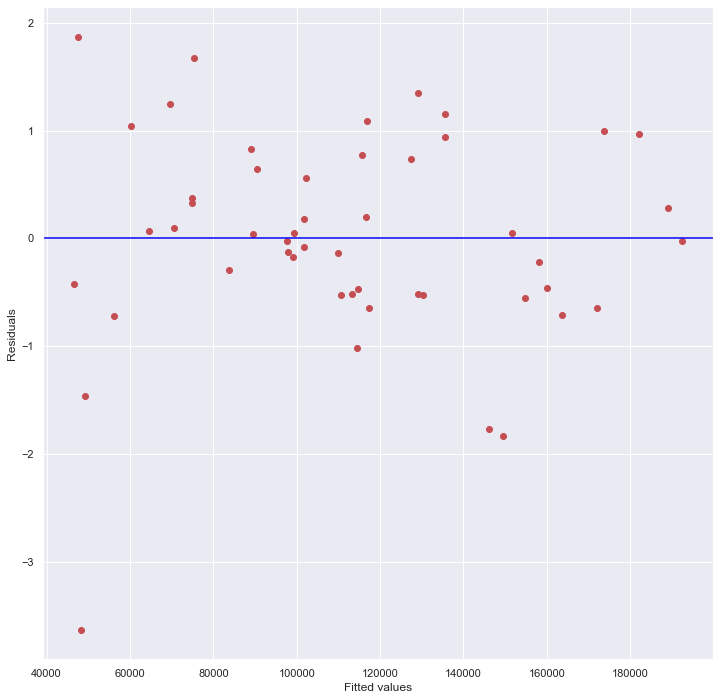

In [181]:
# Residulas vs fitted values:
plt.scatter(finalmodel_pred, profit_model.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")

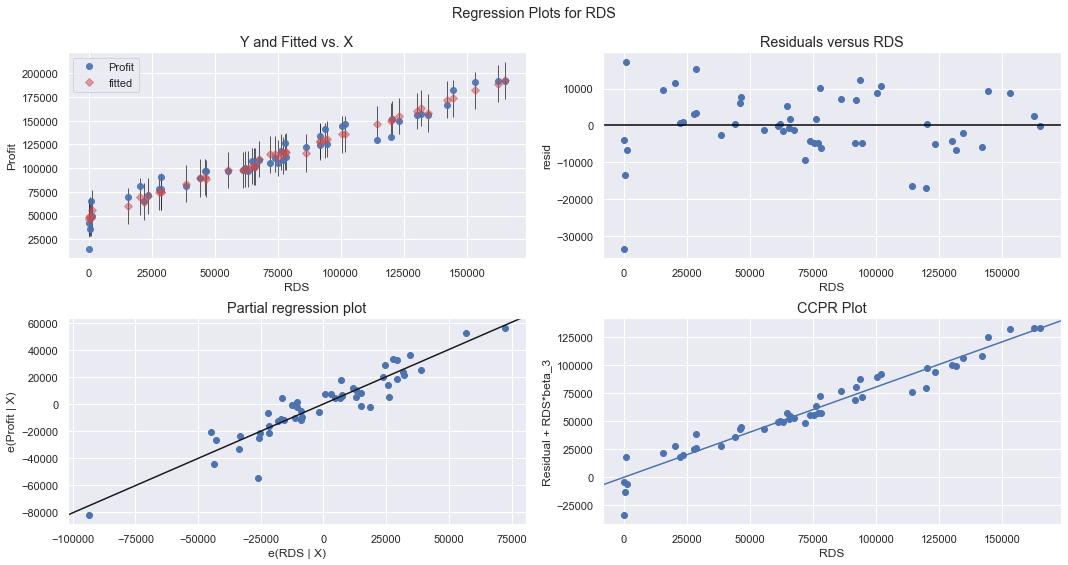

In [182]:
#Plotting regression plots for all independent variables:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(profit_model,'RDS',fig=fig)
plt.show()

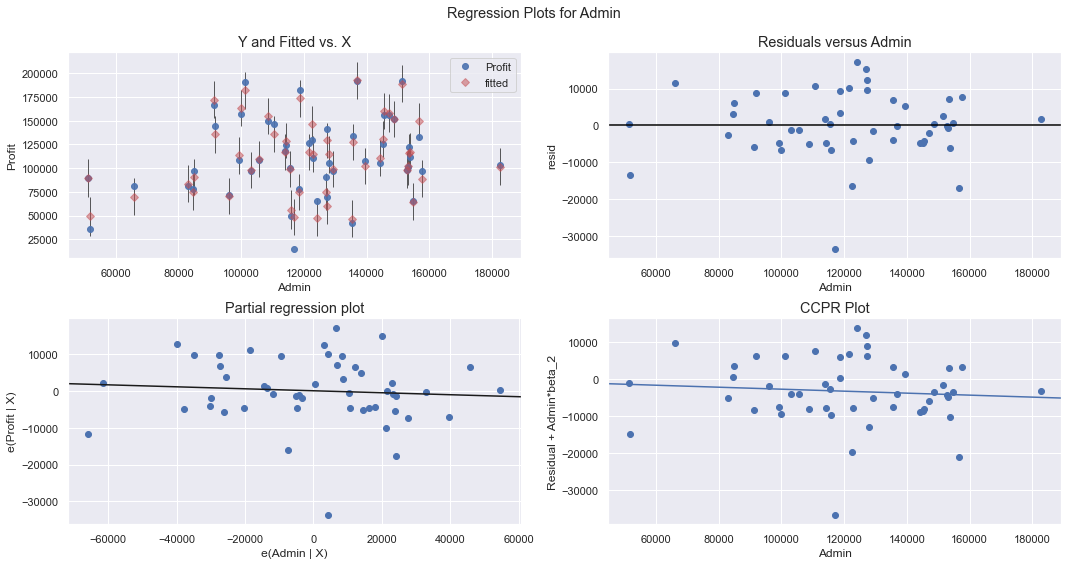

In [183]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(profit_model,'Admin',fig=fig)
plt.show()

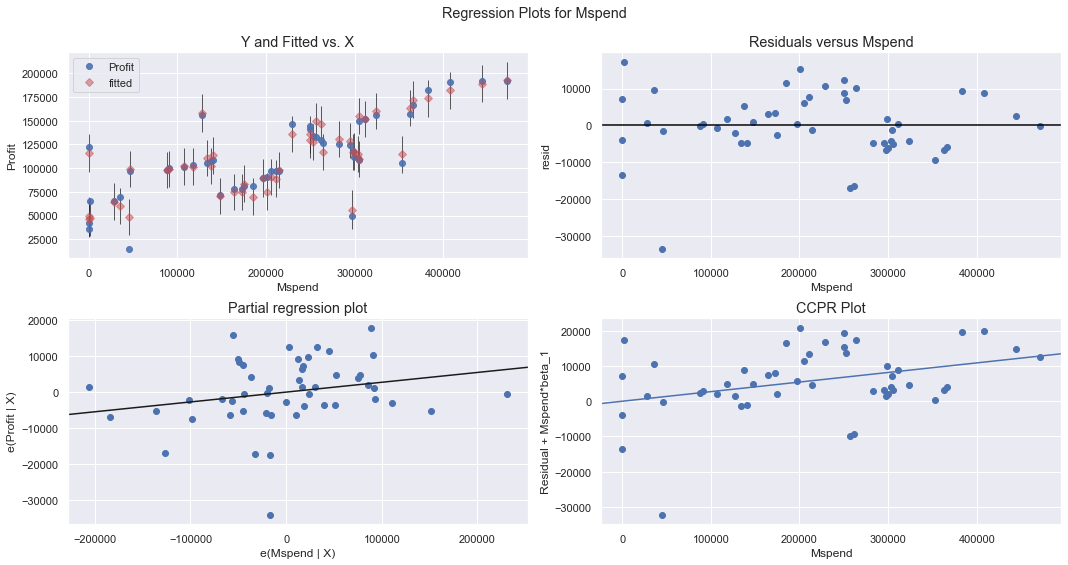

In [184]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(profit_model,'Mspend',fig=fig)
plt.show()

Model deletion diagnostics:

In [187]:
#Cooks distance:
(c,_)=profit_model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<ipython-input-188-278d07143009>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(df)),np.round(c,5))


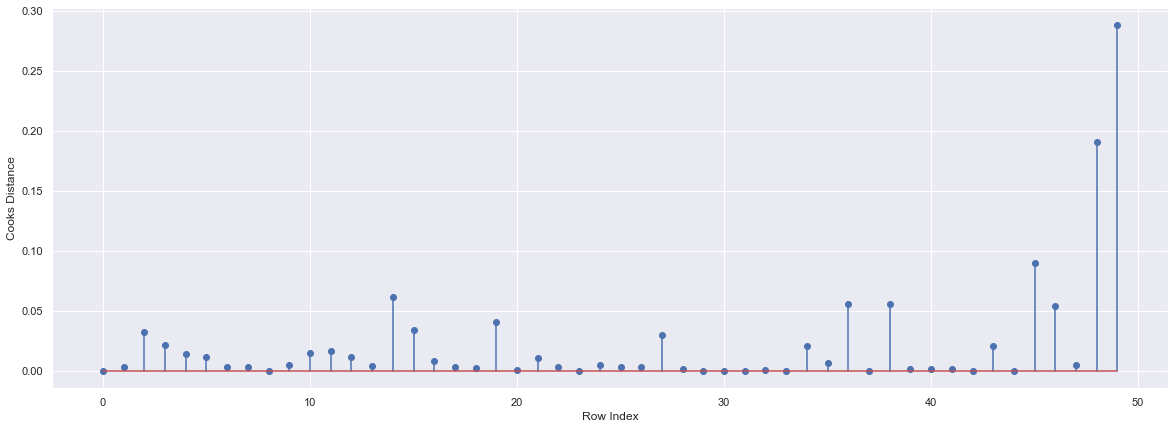

In [188]:
#plotting stem plot:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [189]:
#finding the exact influence value:
np.argmax(c), np.max(c)

(49, 0.2880822927543265)

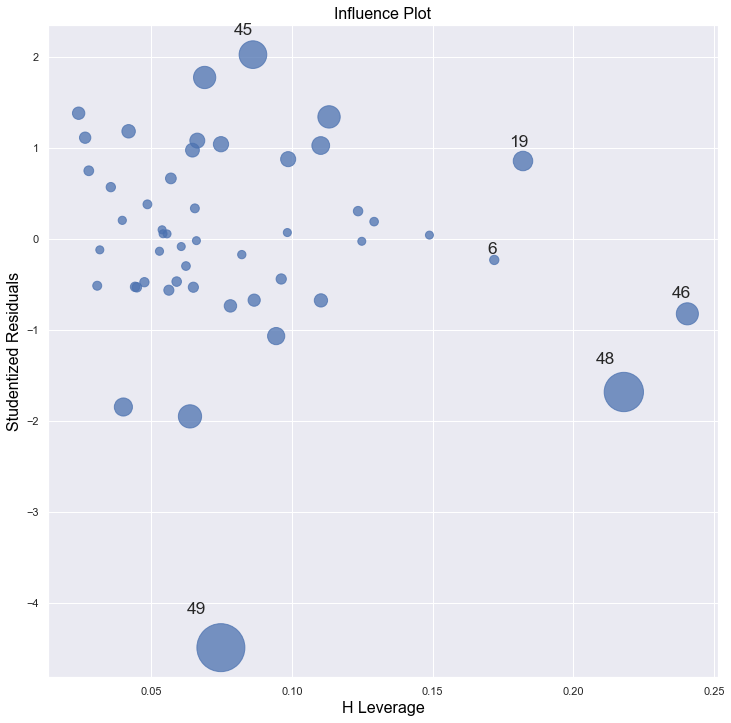

In [190]:
#plotting influence plot:
import statsmodels.api as sm
sm.graphics.influence_plot(profit_model)
plt.show()

In [191]:
# 49 is the most influencial observation, we will remove this

In [193]:
df_1=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df_1.head()

,RDS,Admin,Mspend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [194]:
#building model with this new dataset:
final_model_profit = smf.ols("Profit~RDS+Admin+Mspend",data=df_1).fit()

In [197]:
final_model_profit.rsquared

0.9613162435129847

The model could explain 96.13% variability on profit by regressing R&D Spend, Administration and Marketing spend.